In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
from prophet import Prophet
import matplotlib.dates as mdates
import itertools
from statsmodels.tsa.arima.model import ARIMA

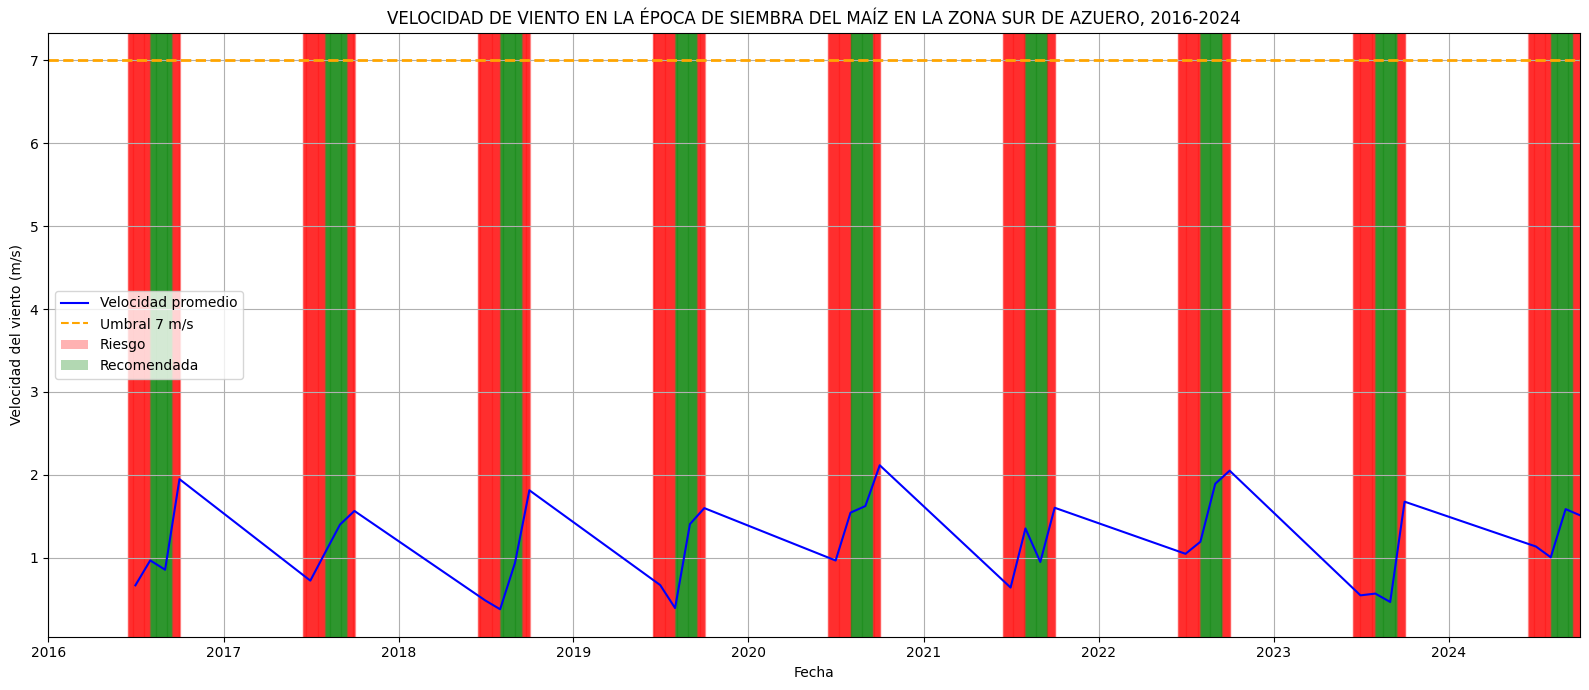

In [ ]:
vientolosdsantos = pd.read_csv('/content/vientolosdsantos_temporadadesiembra.csv')
epoca_todos_años = pd.read_csv('/content/epoca_siembre_2016-2025.csv')
vientolosdsantos['fecha'] = pd.to_datetime(vientolosdsantos['fecha'])
epoca_todos_años['Fecha'] = pd.to_datetime(epoca_todos_años['Fecha'])

plt.figure(figsize=(16,7))

# Línea de velocidad del viento
plt.plot(vientolosdsantos['fecha'],
         vientolosdsantos['velocidad_viento'],
         color='blue', label='Velocidad promedio')

# Línea de umbral de viento (7 m/s)
plt.axhline(y=7, color='orange', linestyle='--', linewidth=2, label='Umbral 7 m/s')

# Franjas sombreadas según tipo de evento
colores = {'Riesgo': 'red', 'Recomendada': 'green'}
for i, row in epoca_todos_años.iterrows():
    fecha_inicio = row['Fecha']
    fecha_fin = fecha_inicio + pd.Timedelta(days=1)
    plt.axvspan(fecha_inicio, fecha_fin, color=colores.get(row['Tipo'], 'gray'), alpha=0.3)

# Leyenda
leyenda_colores = [Patch(facecolor=colores[tipo], alpha=0.3, label=tipo) for tipo in colores]
plt.legend(handles=[plt.Line2D([], [], color='blue', label='Velocidad promedio'),
                    plt.Line2D([], [], color='orange', linestyle='--', label='Umbral 7 m/s')] + leyenda_colores)

# Limitar eje x
plt.xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2024-10-01'))

plt.title("VELOCIDAD DE VIENTO EN LA ÉPOCA DE SIEMBRA DEL MAÍZ EN LA ZONA SUR DE AZUERO, 2016-2024")
plt.xlabel("Fecha")
plt.ylabel("Velocidad del viento (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


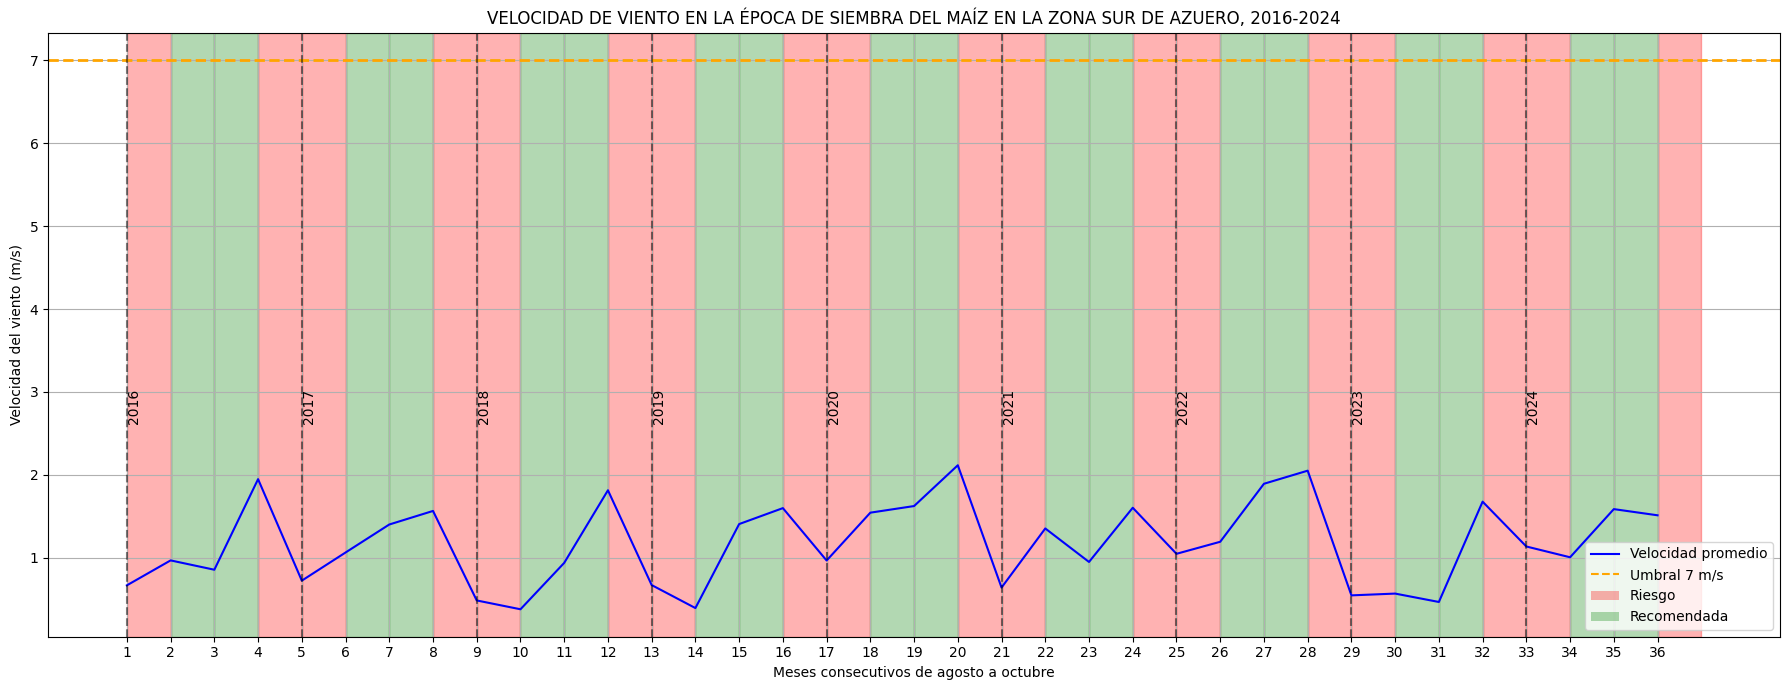

In [ ]:

# --- Cargar el CSV consolidado ---
df_export = pd.read_csv('/content/vientos_diascontinuos.csv')

# --- Asegurarse de que fecha sea datetime ---
df_export['fecha'] = pd.to_datetime(df_export['fecha'])

plt.figure(figsize=(18,7))

# Línea de velocidad del viento
plt.plot(df_export['Dias_Consecutivos'],
         df_export['velocidad_viento'],
         color='blue', label='Velocidad promedio')

# Línea de umbral de viento (7 m/s)
plt.axhline(y=7, color='orange', linestyle='--', linewidth=2, label='Umbral 7 m/s')

# Colores según el tipo de época
colores = {'Riesgo': 'red', 'Recomendada': 'green'}

# Franjas sombreadas según el tipo de época en el CSV
for i, row in df_export.iterrows():
    if row['Tipo'] in colores:  # solo si hay tipo asignado
        plt.axvspan(row['Dias_Consecutivos'],
                    row['Dias_Consecutivos']+1,
                    color=colores[row['Tipo']],
                    alpha=0.3)

# Marcar inicio de cada año con línea vertical y etiqueta
años = df_export['fecha'].dt.year.unique()
for año in años:
    idx_inicio = df_export[df_export['fecha'].dt.year == año].index[0]
    x_pos = df_export.loc[idx_inicio, 'Dias_Consecutivos']
    plt.axvline(x=x_pos, color='black', linestyle='--', alpha=0.5)
    plt.text(x_pos,
             max(df_export['velocidad_viento']) + 0.5,
             str(año),
             rotation=90,
             verticalalignment='bottom',
             fontsize=10)

# Forzar que se muestren todos los días consecutivos en el eje X
plt.xticks(df_export['Dias_Consecutivos'])

# Leyenda
leyenda_colores = [Patch(facecolor=colores[tipo], alpha=0.3, label=tipo) for tipo in colores]
plt.legend(handles=[
    plt.Line2D([], [], color='blue', label='Velocidad promedio'),
    plt.Line2D([], [], color='orange', linestyle='--', label='Umbral 7 m/s')
] + leyenda_colores)

plt.title("VELOCIDAD DE VIENTO EN LA ÉPOCA DE SIEMBRA DEL MAÍZ EN LA ZONA SUR DE AZUERO, 2016-2024")
plt.xlabel("Meses consecutivos de agosto a octubre")
plt.ylabel("Velocidad del viento (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjw0xuk_/mknsez0s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdjw0xuk_/0ounsgdy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33841', 'data', 'file=/tmp/tmpdjw0xuk_/mknsez0s.json', 'init=/tmp/tmpdjw0xuk_/0ounsgdy.json', 'output', 'file=/tmp/tmpdjw0xuk_/prophet_modely77_dinw/prophet_model-20250924012642.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:26:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:26:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.12/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version

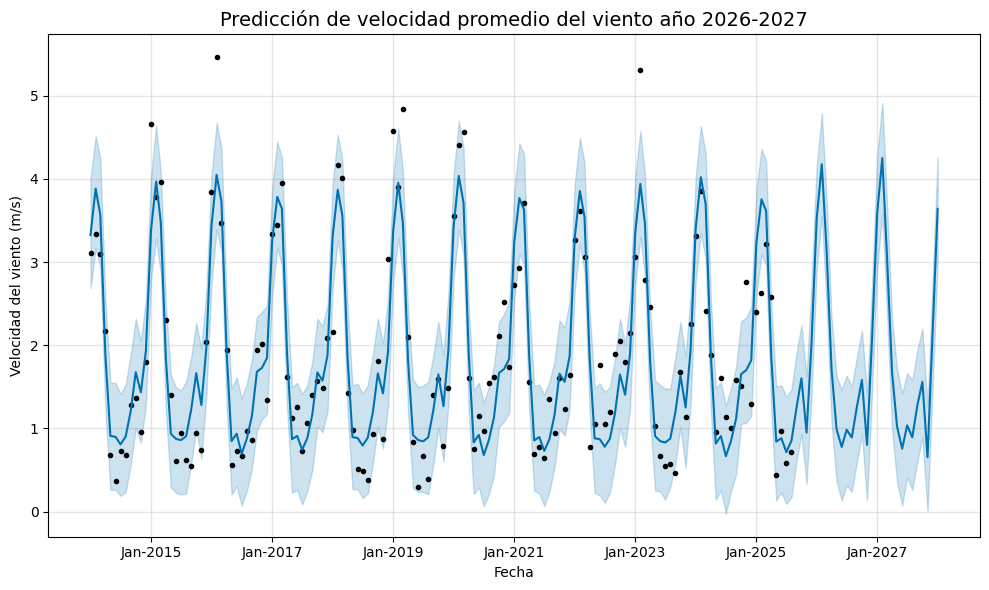

In [ ]:

# Preparar datos
df_grafica = pd.read_csv('/content/vientoslossantos_2014-2024.csv')
df_prophet = df_grafica[['fecha','velocidad_viento']].rename(columns={'fecha':'ds','velocidad_viento':'y'})
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Crear y entrenar modelo
modelo = Prophet(yearly_seasonality=True, daily_seasonality=False)
modelo.fit(df_prophet)

# Crear predicciones para 1 año futuro
#future = modelo.make_future_dataframe(periods=365)
future = modelo.make_future_dataframe(periods=29, freq='M')
forecast = modelo.predict(future)
forecast.to_csv('/content/resultados_forescast.csv', index=False)
# Graficar



fig = modelo.plot(forecast)
ax = fig.gca()

# Formato del eje X: Mes-Año
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

# Título y etiquetas
ax.set_title("Predicción de velocidad promedio del viento año 2026-2027", fontsize=14)
ax.set_xlabel("Fecha")
ax.set_ylabel("Velocidad del viento (m/s)")

plt.tight_layout()
plt.show()

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot

Mejor modelo: ARIMA(2, 0, 2) con AIC=325.08926237804747


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


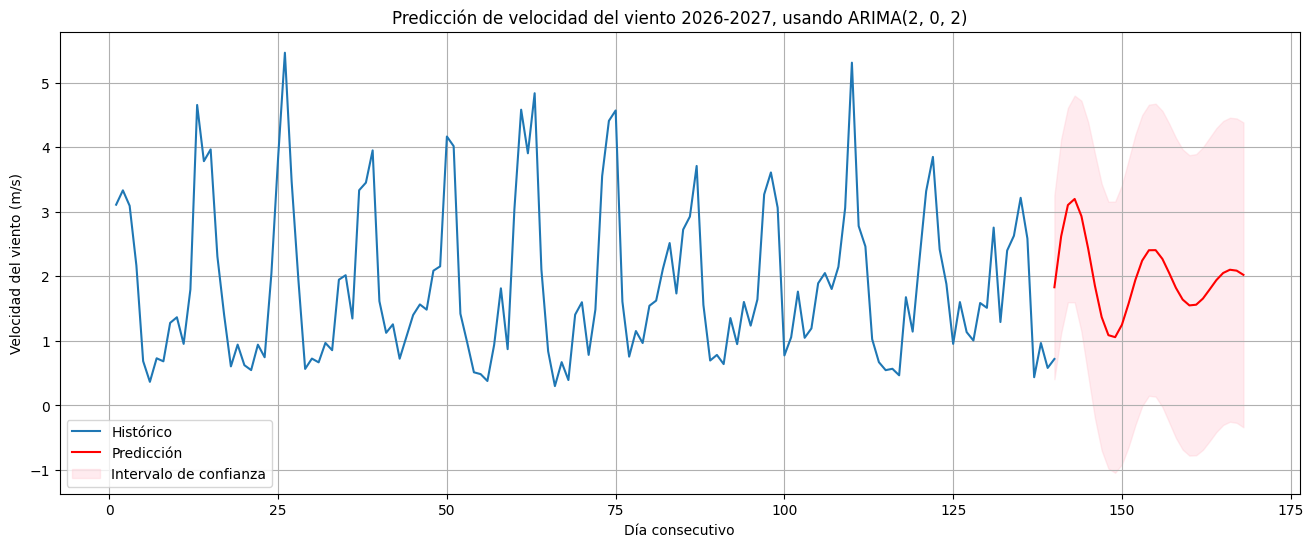

Predicción guardada en /content/prediccion_arima.csv
   dia_consecutivo  prediccion  ic_lower  ic_upper
0              140    1.830655  0.406057  3.255253
1              141    2.620233  1.117146  4.123319
2              142    3.104132  1.598835  4.609430
3              143    3.198296  1.598032  4.798561
4              144    2.933257  1.146284  4.720230


In [ ]:


# Cargar dataset
predecir_arima = pd.read_csv('/content/vientoslossantos_2014-2024.csv')
predecir_arima['dia_consecutivo'] = np.arange(1, len(predecir_arima) + 1)

# Serie temporal
ts = pd.Series(predecir_arima['velocidad_viento'].values, index=predecir_arima['dia_consecutivo'])

# Rango de parámetros a probar
p = d = q = range(0, 3)
pdq = list(itertools.product(p, d, q))

best_aic = np.inf
best_order = None
best_model = None

for order in pdq:
    try:
        modelo = ARIMA(ts, order=order)
        modelo_fit = modelo.fit()
        if modelo_fit.aic < best_aic:
            best_aic = modelo_fit.aic
            best_order = order
            best_model = modelo_fit
    except:
        continue

print(f"Mejor modelo: ARIMA{best_order} con AIC={best_aic}")
#print(best_model.summary())

# Predicción
pred = best_model.get_forecast(steps=29)
pred_mean = pred.predicted_mean
pred_ci = pred.conf_int()

plt.figure(figsize=(16,6))
plt.plot(ts.index, ts.values, label='Histórico')
plt.plot(pred_mean.index, pred_mean.values, color='red', label='Predicción')
plt.fill_between(pred_ci.index,
                 pred_ci.iloc[:,0],
                 pred_ci.iloc[:,1],
                 color='pink', alpha=0.3, label='Intervalo de confianza')
plt.xlabel('Día consecutivo')
plt.ylabel('Velocidad del viento (m/s)')
plt.title(f'Predicción de velocidad del viento 2026-2027, usando ARIMA{best_order}')
plt.legend()
plt.grid(True)
plt.show()

pred_df = pd.DataFrame({
    "dia_consecutivo": pred_mean.index,
    "prediccion": pred_mean.values,
    "ic_lower": pred_ci.iloc[:, 0].values,
    "ic_upper": pred_ci.iloc[:, 1].values
})

# Guardar a CSV
pred_df.to_csv("/content/prediccion_arima.csv", index=False)

print("Predicción guardada en /content/prediccion_arima.csv")
print(pred_df.head())

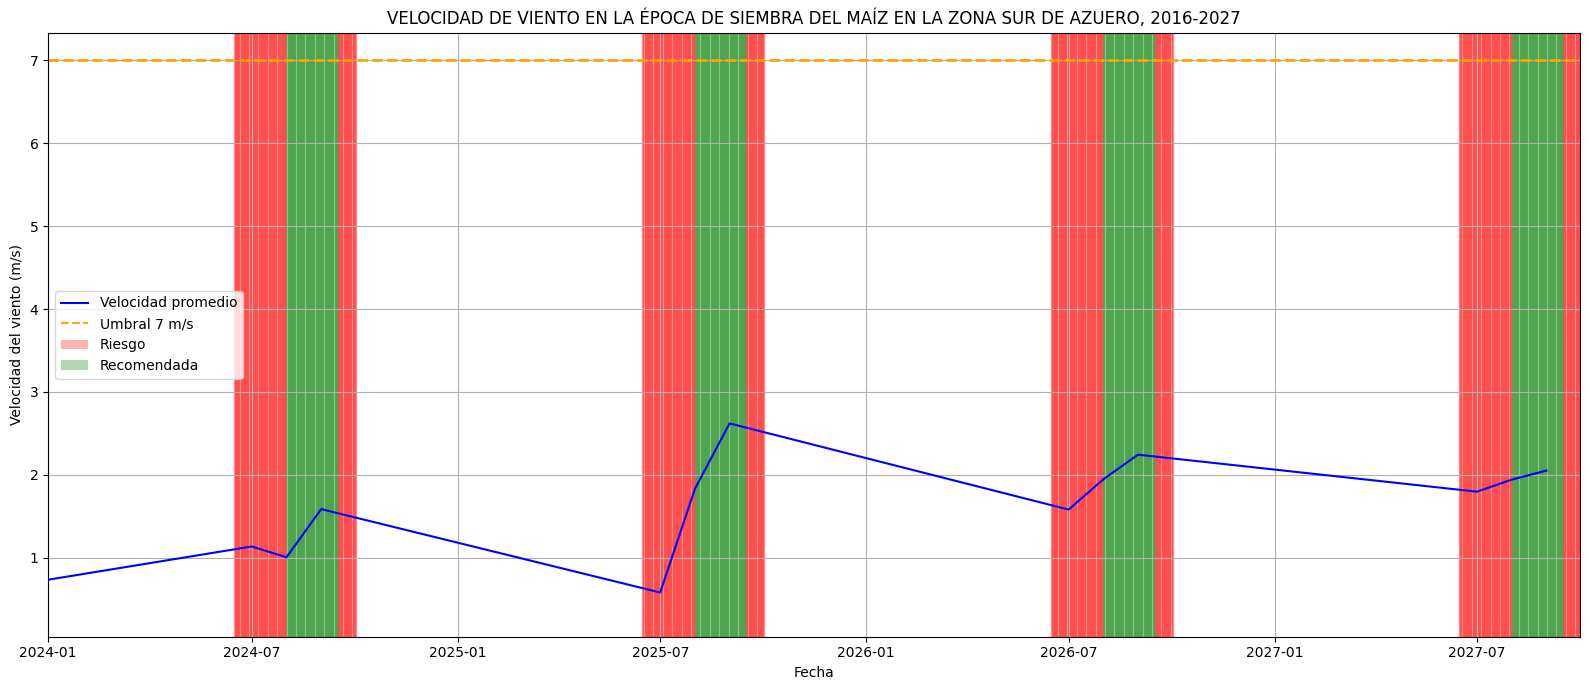

In [ ]:
vientolosdsantos = pd.read_csv('/content/Vientos_predecidosarima.csv')
epoca_todos_años = pd.read_csv('/content/epoca_siembre_2016-2027.csv')
vientolosdsantos['fecha'] = pd.to_datetime(vientolosdsantos['fecha'])
epoca_todos_años['Fecha'] = pd.to_datetime(epoca_todos_años['Fecha'])
vientolosdsantos = vientolosdsantos[
    (vientolosdsantos['fecha'].dt.year >= 2016) &
    (vientolosdsantos['fecha'].dt.year <= 2027)
].copy()

# Filtrar solo fechas entre 15-jun y 30-sep
vientolosdsantos = vientolosdsantos[
    ((vientolosdsantos['fecha'].dt.month == 6) & (vientolosdsantos['fecha'].dt.day >= 15)) |
    ((vientolosdsantos['fecha'].dt.month == 7)) |
    ((vientolosdsantos['fecha'].dt.month == 8)) |
    ((vientolosdsantos['fecha'].dt.month == 9) & (vientolosdsantos['fecha'].dt.day <= 30))
].reset_index(drop=True)

plt.figure(figsize=(16,7))

# Línea de velocidad del viento
plt.plot(vientolosdsantos['fecha'],
         vientolosdsantos['velocidad_viento'],
         color='blue', label='Velocidad promedio')

# Línea de umbral de viento (7 m/s)
plt.axhline(y=7, color='orange', linestyle='--', linewidth=2, label='Umbral 7 m/s')

# Franjas sombreadas según tipo de evento
colores = {'Riesgo': 'red', 'Recomendada': 'green'}
for i, row in epoca_todos_años.iterrows():
    fecha_inicio = row['Fecha']
    fecha_fin = fecha_inicio + pd.Timedelta(days=1)
    plt.axvspan(fecha_inicio, fecha_fin, color=colores.get(row['Tipo'], 'gray'), alpha=0.3)

# Leyenda
leyenda_colores = [Patch(facecolor=colores[tipo], alpha=0.3, label=tipo) for tipo in colores]
plt.legend(handles=[plt.Line2D([], [], color='blue', label='Velocidad promedio'),
                    plt.Line2D([], [], color='orange', linestyle='--', label='Umbral 7 m/s')] + leyenda_colores)

# Limitar eje x
plt.xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2027-10-01'))

plt.title("VELOCIDAD DE VIENTO EN LA ÉPOCA DE SIEMBRA DEL MAÍZ EN LA ZONA SUR DE AZUERO, 2016-2027")
plt.xlabel("Fecha")
plt.ylabel("Velocidad del viento (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

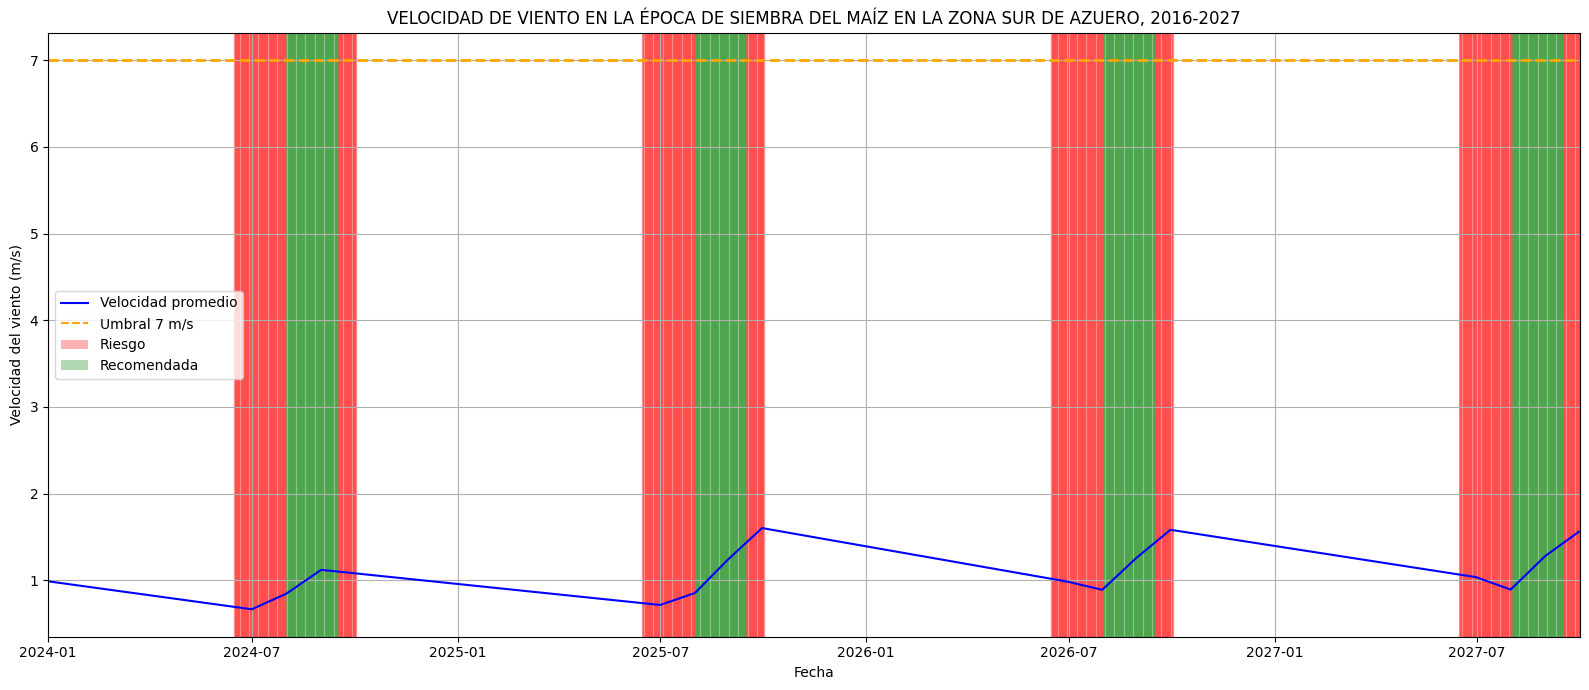

In [ ]:
vientolosdsantos = pd.read_csv('/content/resultados_forescast.csv')
epoca_todos_años = pd.read_csv('/content/epoca_siembre_2016-2027.csv')
vientolosdsantos=vientolosdsantos.rename(columns={"ds": "fecha"})
vientolosdsantos=vientolosdsantos.rename(columns={"yhat": "velocidad_viento"})
vientolosdsantos['fecha'] = pd.to_datetime(vientolosdsantos['fecha'])
epoca_todos_años['Fecha'] = pd.to_datetime(epoca_todos_años['Fecha'])
vientolosdsantos = vientolosdsantos[
    (vientolosdsantos['fecha'].dt.year >= 2016) &
    (vientolosdsantos['fecha'].dt.year <= 2027)
].copy()

# Filtrar solo fechas entre 15-jun y 30-sep
vientolosdsantos = vientolosdsantos[
    ((vientolosdsantos['fecha'].dt.month == 6) & (vientolosdsantos['fecha'].dt.day >= 15)) |
    ((vientolosdsantos['fecha'].dt.month == 7)) |
    ((vientolosdsantos['fecha'].dt.month == 8)) |
    ((vientolosdsantos['fecha'].dt.month == 9) & (vientolosdsantos['fecha'].dt.day <= 30))
].reset_index(drop=True)

plt.figure(figsize=(16,7))

# Línea de velocidad del viento
plt.plot(vientolosdsantos['fecha'],
         vientolosdsantos['velocidad_viento'],
         color='blue', label='Velocidad promedio')

# Línea de umbral de viento (7 m/s)
plt.axhline(y=7, color='orange', linestyle='--', linewidth=2, label='Umbral 7 m/s')

# Franjas sombreadas según tipo de evento
colores = {'Riesgo': 'red', 'Recomendada': 'green'}
for i, row in epoca_todos_años.iterrows():
    fecha_inicio = row['Fecha']
    fecha_fin = fecha_inicio + pd.Timedelta(days=1)
    plt.axvspan(fecha_inicio, fecha_fin, color=colores.get(row['Tipo'], 'gray'), alpha=0.3)

# Leyenda
leyenda_colores = [Patch(facecolor=colores[tipo], alpha=0.3, label=tipo) for tipo in colores]
plt.legend(handles=[plt.Line2D([], [], color='blue', label='Velocidad promedio'),
                    plt.Line2D([], [], color='orange', linestyle='--', label='Umbral 7 m/s')] + leyenda_colores)

# Limitar eje x
plt.xlim(pd.Timestamp('2024-01-01'), pd.Timestamp('2027-10-01'))

plt.title("VELOCIDAD DE VIENTO EN LA ÉPOCA DE SIEMBRA DEL MAÍZ EN LA ZONA SUR DE AZUERO, 2016-2027")
plt.xlabel("Fecha")
plt.ylabel("Velocidad del viento (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

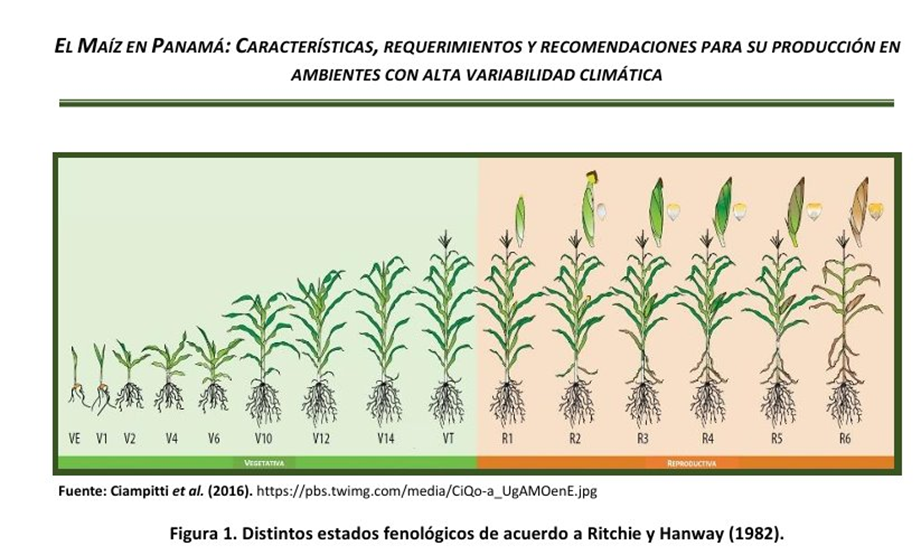

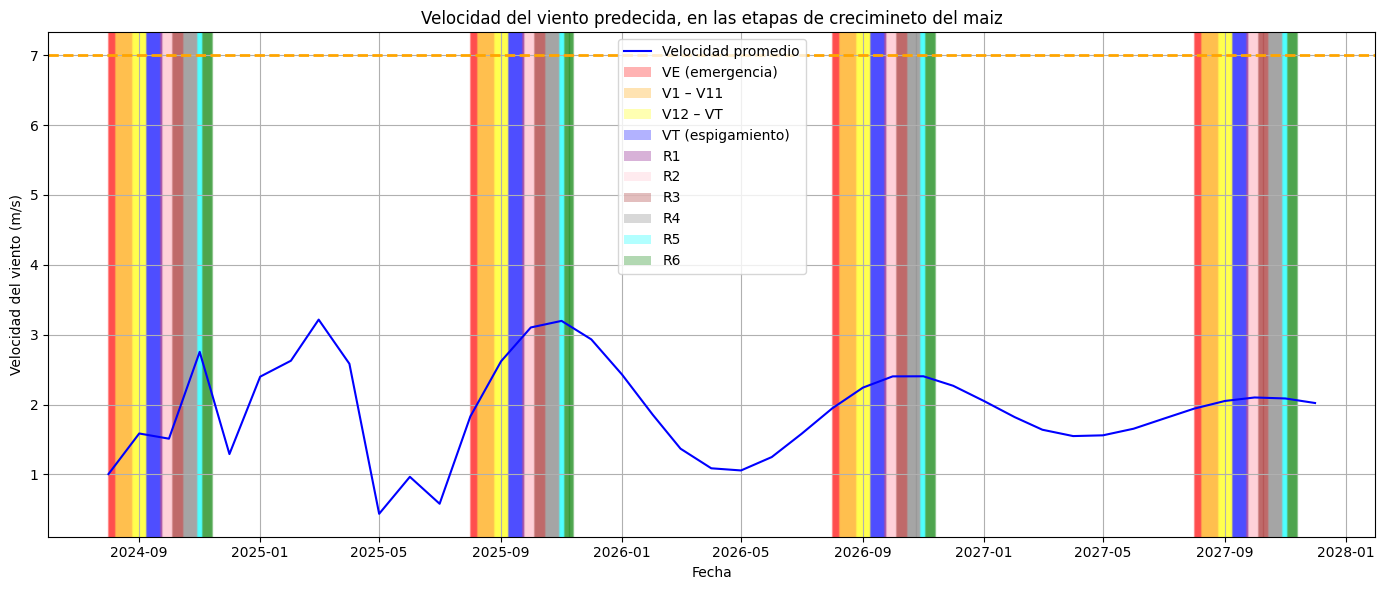

In [ ]:
maiz = pd.read_csv('/content/etapas_maiz_104dias_2027.csv',encoding='utf-8')
vientolosdsantos= pd.read_csv('/content/Vientos_predecidosarima.csv')
vientolosdsantos['fecha'] = pd.to_datetime(vientolosdsantos['fecha'])
fecha_inicio = "2024-08-01"
fecha_fin = "2027-12-01"
vientos =vientolosdsantos[
    (vientolosdsantos['fecha'] >= fecha_inicio) &
    (vientolosdsantos['fecha'] <= fecha_fin)
]
# Asegurarse de que la columna Fecha es datetime
maiz['Fecha'] = pd.to_datetime(maiz['Fecha'])

plt.figure(figsize=(14,6))

# Línea de velocidad del viento
plt.plot(vientos['fecha'],
         vientos['velocidad_viento'],
         color='blue', label='Velocidad promedio')

# Colores según el tipo de evento
colores = {
    'VE (emergencia)': 'red',
    'V1 – V11': 'orange',
    'V12 – VT': 'yellow',
    'VT (espigamiento)': 'blue',
    'R1': 'purple',
    'R2': 'pink',
    'R3': 'brown',
    'R4': 'gray',
    'R5': 'cyan',
    'R6': 'green'
}
plt.axhline(y=7, color='orange', linestyle='--', linewidth=2, label='Umbral 7 m/s')
# Franjas sombreadas
for i, row in maiz.iterrows():
    fecha_inicio = row['Fecha']
    # Suponiendo que cada periodo dura 1 día; ajusta si tienes rango mayor
    fecha_fin = fecha_inicio + pd.Timedelta(days=1)
    plt.axvspan(fecha_inicio, fecha_fin, color=colores.get(row['Etapa'], 'gray'), alpha=0.3)

# Crear leyenda manual para los tipos
from matplotlib.patches import Patch
leyenda_colores = [Patch(facecolor=colores[tipo], alpha=0.3, label=tipo) for tipo in colores]
plt.legend(handles=[plt.Line2D([], [], color='blue', label='Velocidad promedio')] + leyenda_colores)

# Estética y etiquetas
plt.title("Velocidad del viento predecida, en las etapas de crecimineto del maiz")
plt.xlabel("Fecha")
plt.ylabel("Velocidad del viento (m/s)")
plt.grid(True)
plt.tight_layout()
plt.show()

R5 es la etapa donde el grano está llenándose y comienza a endurecerse. Vientos fuertes pueden doblar, quebrar o tumbar las plantas, lo que reduce la fotosíntesis y el transporte de nutrientes hacia el grano.ientos fuertes: 30–50 km/h
Estrés hídrico y transpiración:

Incluso vientos más suaves (15–25 km/h) pueden aumentar la evapotranspiración, especialmente si el suelo está seco. Esto puede reducir ligeramente el tamaño del grano.